### 1. Vamos utilizar uma base que contém dados relacionados a diamantes. Nossa variável alvo será a 'cut' e utilizaremos as demais como variáveis explicativas.

> Nesta base temos 35.342 observações e 10 variáveis. Segue a descrição de cada uma das variáveis:
* price: price in US dollars ($326--$18,823)
* carat: weight of the diamond (0.2--5.01)
* color: diamond colour, from D (best) to J (worst)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0--10.74)
* y: width in mm (0--58.9)
* z: depth in mm (0--31.8)
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table: width of top of diamond relative to widest point (43--95)
* cut (Target): quality of the cut (Premium, Ideal)
> Utilize a linguagem Python para carregar a base que está no link abaixo, e lembre-se de inspecionar o arquivo para utilizar a instrução de importação de forma que funcione corretamente. 

> Faça a importação diretamente do Github e armazene os dados em um data frame único. 

> Apresente esta base.

In [12]:
#%pip install xgboost

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
import random

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/cassiusf/datasets/main/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
4,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33


### 2. Após carregar a base, execute as seguintes operações:
> Transforme as variáveis 'clarity' e 'color' em variáveis dummy e remova as variáveis originais da base.

> Apresente em uma visualização única a distribuição de valores da variável-alvo.

> Recodifique a variável alvo, utilizando e referência a seguir:
* (0) 'Ideal'
* (1) 'Premium'


> Separe o conjunto das variáveis independentes da variável dependente.

> Execute um 'Standard Scaler' no conjunto de variáveis independentes.

> Separe os dados resultantes em bases de Treino e Teste, utilizando a proporção 70-30%.

> A partir do data frame totalmente ajustado, aplique um modelo de árvore de decisão simples, utilizando as opções padrão do classificador.

In [15]:
#Transforme as variáveis 'clarity' e 'color' em variáveis dummy e remova as variáveis originais da base.
df = pd.get_dummies(df, columns=['clarity', 'color'], drop_first=True)
df.head()

,carat,cut,depth,table,price,x,y,z,clarity_IF,clarity_SI1,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,False,False,...,False,True,False,False,False,False,False,False,True,False
3,0.23,Ideal,62.8,56.0,340,3.93,3.90,2.46,False,False,...,True,False,False,False,False,False,False,False,False,True
4,0.22,Premium,60.4,61.0,342,3.88,3.84,2.33,False,True,...,False,False,False,False,False,True,False,False,False,False


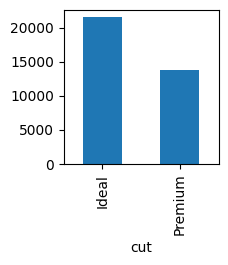

In [16]:
#Apresente em uma visualização única a distribuição de valores da variável-alvo.
plt.figure(figsize=(2,2))
df['cut'].value_counts().plot(kind='bar')
plt.show()

In [17]:
# Recodifique a variável alvo, utilizando e referência a seguir: (0) 'Ideal' (1) 'Premium'
df['cut'] = df['cut'].map({'Ideal': 0, 'Premium': 1})

In [18]:
#Separe o conjunto das variáveis independentes da variável dependente.
X = df.drop('cut', axis=1)
y = df['cut']

In [19]:
#Execute um 'Standard Scaler' no conjunto de variáveis independentes.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
#Separe os dados resultantes em bases de Treino e Teste, utilizando a proporção 70-30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [25]:
#A partir do data frame totalmente ajustado, aplique um modelo de árvore de decisão simples, utilizando as opções padrão do classificador.
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### 3. Apresente a matriz de confusão gerada a partir da aplicação do modelo no conjunto de testes.

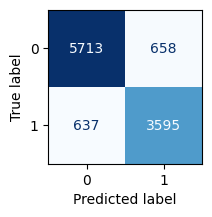

In [34]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False, ax=ax)
plt.show()

### 4. Apresente o correspondente relatório de classificação com as métricas de execução da árvore de decisão.

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6371
           1       0.85      0.85      0.85      4232

    accuracy                           0.88     10603
   macro avg       0.87      0.87      0.87     10603
weighted avg       0.88      0.88      0.88     10603



### 5. Utilize os mesmos conjuntos de Treino e Teste para executar um modelo Random Forest, utilizando as opções padrão do classificador e o correspondente relatório de classificação com as métricas de execução.

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6371
           1       0.91      0.88      0.89      4232

    accuracy                           0.92     10603
   macro avg       0.92      0.91      0.91     10603
weighted avg       0.92      0.92      0.92     10603



### 6. Execute um GridSearch buscando a melhor configuração para os parâmetros 'criterion', 'max_depth' e 'max_features' da Random Forest. Utilize a acurácia como métrica-alvo, apresente a melhor combinação de parâmetros encontrada pelo procedimento e execute o modelo para esta melhor combinação.

In [38]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10],'max_features': ['sqrt', 'log2']}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}


In [39]:
rf_best = RandomForestClassifier(**grid_search.best_params_)
rf_best.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_test)

### 7. Apresente o relatório de classificação a partir da execução do modelo com a melhor configuração no conjunto de testes.

In [40]:
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6371
           1       0.91      0.88      0.89      4232

    accuracy                           0.92     10603
   macro avg       0.91      0.91      0.91     10603
weighted avg       0.92      0.92      0.92     10603



### 8. Utilize os mesmos conjuntos de Treino e Teste da questão 2 para executar um modelo XGBoost, utilizando as opções padrão do classificador e o correspondente relatório de classificação com as métricas de execução.

In [43]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6371
           1       0.91      0.88      0.89      4232

    accuracy                           0.92     10603
   macro avg       0.91      0.91      0.91     10603
weighted avg       0.92      0.92      0.92     10603



### 9. Utilize os mesmos conjuntos de Treino e Teste da questão 2 para executar um modelo SVM, utilizando as opções padrão do classificador e o correspondente relatório de classificação com as métricas de execução.

In [44]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6371
           1       0.91      0.86      0.89      4232

    accuracy                           0.91     10603
   macro avg       0.91      0.90      0.91     10603
weighted avg       0.91      0.91      0.91     10603



### 10. Execute um GridSearch buscando a melhor configuração para os parâmetros 'C' e 'kernel' no modelo SVM. Utilize a acurácia como métrica-alvo. 

In [45]:
param_grid_svm = {'C': [0.1, 1, 10, 100],'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

### 11. Apresente a melhor combinação de parâmetros encontrada pelo procedimento da questão 10 e execute o modelo para esta melhor combinação.

In [ ]:
print(grid_search_svm.best_params_)

svm_best = SVC(**grid_search_svm.best_params_)
svm_best.fit(X_train, y_train)
y_pred_svm_best = svm_best.predict(X_test)

In [ ]:
print(grid_search_svm.best_params_)

### 12. Apresente o relatório de classificação a partir da execução do modelo com a melhor configuração no conjunto de testes.

In [ ]:
print(classification_report(y_test, y_pred_svm_best))

### 13. A partir do melhor modelo Random Forest indicado pelo GridSearch na questão 6, apresente, por meio de uma visualização, a importância de cada variável utilizada no resultado final (Feature Importance).

In [ ]:
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### 14. Indique quais foram as três variáveis mais relevantes para o resultado final, na execução avaliada na questão 13. Justifique sua resposta.


### 15. Novamente a partir do melhor modelo Random Forest indicado pelo GridSearch na questão 6, execute e aplique a técnica LIME em duas observações do conjunto de testes (escolha aleatoriamente).

In [ ]:
# Aplicar a técnica LIME em duas observações do conjunto de testes
explainer = LimeTabularExplainer(X_train, feature_names=df.columns, class_names=le.classes_, discretize_continuous=True)
for i in [0, 1]:
    exp = explainer.explain_instance(X_test[i], grid.predict_proba)
    exp.show_in_notebook(show_table=True, show_all=False)

### 16. Apresente as variáveis das observações escolhidas na questão 15, indique os dois fatores que mais influenciaram na classificação de cada uma das observações e interprete o resultado da aplicação da técnica LIME nestas mesmas observações.